# **Group 12, Japan**

### **Download 3 Excel data at : https://github.com/sylviaLong/EC1B1Final.git**

**File name: Japan_data.xlsx; US_consumer_prices_all_item.xlsx; US_International_Reserves_and_Liquidity.xlsx**

# **Input Data, Addjustments and Basic Calculations**

In [115]:
#import NumPy for numerical computing
import numpy as np
#import pandas for data manipulation and analysis
import pandas as pd
#read excel file, skiprows = 1 to drop the undesired first row
japan = pd.read_excel("Japan_data.xlsx", sheet_name="International Financial Statis", skiprows = 1)
us_CPI = pd.read_excel("US_consumer_prices_all_item.xlsx", sheet_name="International Financial Statis", skiprows = 1)
us_IR = pd.read_excel("US_International_Reserves_and_Liquidity.xlsx", sheet_name="International Financial Statis", skiprows = 1)

In [116]:
#create copies for datasets to avoid destroying the raw data
japan1 = japan
us_CPI1 = us_CPI
us_IR1 = us_IR

In [117]:
#inspect the Japan1 dataset
japan1.head()

,Unnamed: 0,Unnamed: 1,"Economic Activity, Industrial Production, Index","Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
0,Japan,Jan 1960,11.234317,0.002778,1453.300,18.751149
1,Japan,Feb 1960,12.638607,0.002778,1446.335,18.770130
2,Japan,Mar 1960,13.629870,0.002778,1486.370,18.713187
3,Japan,Apr 1960,12.721212,0.002778,1510.405,18.827063
4,Japan,May 1960,12.803817,0.002778,1544.475,18.997872


In [118]:
#drop the first column of Japan1
japan1 = japan1.drop(['Unnamed: 0'], axis=1)
#change the column name "Unnamed: 0" into "Date"
japan1.rename(columns={'Unnamed: 1': 'Date'}, inplace=True)
#change the datatype of dates from "object" to "datetime64"
japan1['Date'] = pd.to_datetime(japan1['Date'])
#check the resulting dataset
print(japan1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Date                                                                                372 non-null    datetime64[ns]
 1   Economic Activity, Industrial Production, Index                                     372 non-null    float64       
 2   Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate               372 non-null    float64       
 3   International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar  372 non-null    float64       
 4   Prices, Consumer Price Index, All items, Index                                      372 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.7

In [119]:
print(japan1)

          Date  Economic Activity, Industrial Production, Index  \
0   1960-01-01                                        11.234317   
1   1960-02-01                                        12.638607   
2   1960-03-01                                        13.629870   
3   1960-04-01                                        12.721212   
4   1960-05-01                                        12.803817   
..         ...                                              ...   
367 1990-08-01                                        97.701784   
368 1990-09-01                                       106.067686   
369 1990-10-01                                       108.059568   
370 1990-11-01                                       106.466063   
371 1990-12-01                                       108.059568   

     Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate  \
0                                             0.002778                       
1                                      

In [120]:
#inspect the us_CPI1 dataset
us_CPI1.head()

,Unnamed: 0,United States
0,Jan 1960,13.436946
1,Feb 1960,13.482806
2,Mar 1960,13.482806
3,Apr 1960,13.528666
4,May 1960,13.528666


In [121]:
#change the column name "	Unnamed: 0" into "Date" and "United States" into "CPI"
us_CPI1.rename(columns={'Unnamed: 0': 'Date', 'United States': 'CPI'}, inplace=True)
#change the datatype of dates from "object" to "datetime64"
us_CPI1['Date'] = pd.to_datetime(us_CPI['Date'])
#check the resulting dataset
print(us_CPI1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    372 non-null    datetime64[ns]
 1   CPI     372 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB
None


In [122]:
#inspect the us_IR1 dataset
us_IR1.head()

,Unnamed: 0,United States
0,Jan 1960,21478.1
1,Feb 1960,21395.7
2,Mar 1960,21344.7
3,Apr 1960,21278.0
4,May 1960,21234.3


In [123]:
#rename 'Unnamed: 0' 'Date' and rename 'United States' 'IR'
us_IR1.rename(columns={'Unnamed: 0': 'Date', 'United States': 'IR'}, inplace=True)
#change the datatype of dates from "object" to "datetime64"
us_IR1['Date'] = pd.to_datetime(us_IR1['Date'])
#check the resulting dataset
print(us_IR1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    372 non-null    datetime64[ns]
 1   IR      372 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB
None


In [124]:
#monthly growth in Nominal Exchange Rate, Yen per USD
#create var Nominal Exchange Rate, USD per Yen with indexing
ER_USD_per_Yen = japan1.loc[:,"Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate"]
#caculate Nominal Exchange Rate, Yen per USD
ER_Yen_per_USD = 1 / ER_USD_per_Yen
#shift the dataset down by row and assign it to the previous month dataframe
previous_month_ER = ER_Yen_per_USD.shift(1)
#monthly growth in Nominal Exchange Rate, Yen per USD
ER_growth = ((ER_Yen_per_USD - previous_month_ER) / previous_month_ER) * 100
#inspect the result
#used .head() initially, the values were all 0
#so use .tail() to further inspect whether the data make sense
ER_growth.tail(5)

367   -1.245981
368   -5.718356
369   -6.662350
370   -0.501041
371    3.462969
Name: Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate, dtype: float64

In [125]:
#The Japan monthly inflation rate
#create variable for CPI
J_CPI = japan1.loc[:,"Prices, Consumer Price Index, All items, Index"]
#CPI of the previous month
previous_month_J_CPI = J_CPI.shift(1)
#caculate the inflation rate
JP_inflation_rate = ((J_CPI - previous_month_J_CPI) / previous_month_J_CPI) * 100
#inspect result
JP_inflation_rate.head()

0         NaN
1    0.101226
2   -0.303372
3    0.608535
4    0.907254
Name: Prices, Consumer Price Index, All items, Index, dtype: float64

In [126]:
# The monthly inflation rate
us_CPI = us_CPI1.loc[:,"CPI"]
previous_month_us_CPI = us_CPI.shift(1)
us_inflation_rate = ((us_CPI - previous_month_us_CPI) / previous_month_us_CPI) * 100
us_inflation_rate.head()

0         NaN
1    0.341297
2    0.000000
3    0.340136
4    0.000000
Name: CPI, dtype: float64

In [127]:
#The Real Exchange Rate, japan versus us
#create var for US CPI
US_CPI = us_CPI1.loc[:,"CPI"]
#The real exchange rate: RER = eP*/P
RER = ER_Yen_per_USD * US_CPI/J_CPI
#inspect result
RER.head()

0    257.973557
1    258.592249
2    259.379133
3    258.687172
4    256.361323
dtype: float64

In [128]:
#The monthly growth in the real exchange rate
#real exchange rate of the previous month
previous_month_RER = RER.shift(1)
#The monthly growth in the real exchange rate
RER_growth = ((RER - previous_month_RER) / RER) * 100
#inspect result
RER_growth.head()

0         NaN
1    0.239254
2    0.303372
3   -0.267489
4   -0.907254
dtype: float64

In [129]:
#The monthly growth in industrial production
#create var for industrial production
IP = japan1.iloc[:,1]
#industrial production of the previous month
previous_month_IP = IP.shift(1)
#The monthly growth in industrial production
IP_growth = ((IP - previous_month_IP) / previous_month_IP) * 100
#inspect result
IP_growth.tail()

367   -8.828996
368    8.562691
369    1.877934
370   -1.474654
371    1.496726
Name: Economic Activity, Industrial Production, Index, dtype: float64

In [130]:
#The growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.)
#industrial production in the same month the last year
Pre_12_month_IP = IP.shift(12)
#yearly growth of industrial production in terms of month
IP_year_growth = ((IP - Pre_12_month_IP) / Pre_12_month_IP) * 100
#inspect result(13 rows- since the first 12 months don't have corresponding data for the same month last year, expect the result the the first 12th rows to be NaN)
IP_year_growth.head(13)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12    21.323529
Name: Economic Activity, Industrial Production, Index, dtype: float64

In [131]:
#An index of the value of International Reserves (value of reserves at January 1960 = 100)
#index of the current year = value at the current year / value at the base year * 100
#index for Japan
#create var for International Reserves in Japan
J_IR = japan1.loc[:,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar"]
#obtain the Japan IR in the base year
J_IR_base_year = japan1.iloc[0,3]
#calculate the Japan index
J_IR_index = J_IR / J_IR_base_year * 100
#inspect result
J_IR_index.head()

0    100.000000
1     99.520746
2    102.275511
3    103.929333
4    106.273653
Name: International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar, dtype: float64

In [132]:
#IR index for US
#create var for IR in US
US_IR = us_IR1.iloc[:,1]
#obtain the US IR in the base year
US_IR_base_year = us_IR1.iloc[0,1]
#calculate the US index
US_IR_index = US_IR / US_IR_base_year * 100
#inspect result
US_IR_index.head()

0    100.000000
1     99.616353
2     99.378902
3     99.068353
4     98.864890
Name: IR, dtype: float64

In [133]:
#The difference between the inflation in your country versus the United States.
inflation_d = JP_inflation_rate - us_inflation_rate
inflation_d.head()

0         NaN
1   -0.240070
2   -0.303372
3    0.268399
4    0.907254
dtype: float64

# **Cleaning and Finding Outliers**

**Clean Japan data**

In [134]:
#Find outliers

#1.Find mean and standard deviation of each variables
japan.columns = ['Country', 'Date', 'Industrial Production Index', 'Exchange Rate (USD/Unit)', 'International Reserves (USD)', 'Consumer Price Index']

data_cleaned = japan.drop(index=0)

numerical_cols = ['Industrial Production Index', 'Exchange Rate (USD/Unit)', 'International Reserves (USD)', 'Consumer Price Index']
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].astype(float)

mean_cleaned = data_cleaned.mean(numeric_only=True)
std_dev_cleaned = data_cleaned.std(numeric_only=True)

mean_cleaned, std_dev_cleaned


(Industrial Production Index        55.116286
 Exchange Rate (USD/Unit)            0.004011
 International Reserves (USD)    22794.713268
 Consumer Price Index               55.567792
 dtype: float64,
 Industrial Production Index        25.759030
 Exchange Rate (USD/Unit)            0.001493
 International Reserves (USD)    25473.249991
 Consumer Price Index               27.203626
 dtype: float64)

In [135]:
#2.Find outliers (mean ± 3 * standard deviation) for each variable(assume outlier is standard deviation from mean)
outlier_included = {}

for col in numerical_cols:
    mean = data_cleaned[col].mean()
    std_dev = data_cleaned[col].std()
    Min = mean - 3 * std_dev
    Max = mean + 3 * std_dev
    outlier_included[col] = (Min, Max)

outliers = {}

for col in numerical_cols:
    outliers[col] = data_cleaned[(data_cleaned[col] < outlier_included[col][0]) | (data_cleaned[col] > outlier_included[col][1])]

outlier_counts = {col: len(outliers[col]) for col in outliers}

outlier_counts, outlier_included

({'Industrial Production Index': 0,
  'Exchange Rate (USD/Unit)': 0,
  'International Reserves (USD)': 2,
  'Consumer Price Index': 0},
 {'Industrial Production Index': (-22.160803092146743, 132.39337606951153),
  'Exchange Rate (USD/Unit)': (-0.0004666444057593415, 0.008488703446646834),
  'International Reserves (USD)': (-53625.036705377934, 99214.46324161983),
  'Consumer Price Index': (-26.043085306105354, 137.17866897279515)})

In [136]:
#Interpolate missing data
for col in outliers:
    if len(outliers[col]) > 0:
        outlier_indices = outliers[col].index
        data_cleaned.loc[outlier_indices, col] = np.nan

for col in data_cleaned.columns:
    for i in range(1, len(data_cleaned) - 1):
        if pd.isnull(data_cleaned.loc[i, col]):
            before = data_cleaned.loc[i - 1, col]
            after = data_cleaned.loc[i + 1, col]
            data_cleaned.loc[i, col] = (before + after) / 2
print(data_cleaned)

    Country      Date  Industrial Production Index  Exchange Rate (USD/Unit)  \
1     Japan  Feb 1960                    12.638607                  0.002778   
2     Japan  Mar 1960                    13.629870                  0.002778   
3     Japan  Apr 1960                    12.721212                  0.002778   
4     Japan  May 1960                    12.803817                  0.002778   
5     Japan  Jun 1960                    12.803817                  0.002778   
..      ...       ...                          ...                       ...   
367   Japan  Aug 1990                    97.701784                  0.006783   
368   Japan  Sep 1990                   106.067686                  0.007195   
369   Japan  Oct 1990                   108.059568                  0.007708   
370   Japan  Nov 1990                   106.466063                  0.007747   
371   Japan  Dec 1990                   108.059568                  0.007488   

     International Reserves (USD)  Cons

In [137]:
japan = data_cleaned
print(japan)

    Country      Date  Industrial Production Index  Exchange Rate (USD/Unit)  \
1     Japan  Feb 1960                    12.638607                  0.002778   
2     Japan  Mar 1960                    13.629870                  0.002778   
3     Japan  Apr 1960                    12.721212                  0.002778   
4     Japan  May 1960                    12.803817                  0.002778   
5     Japan  Jun 1960                    12.803817                  0.002778   
..      ...       ...                          ...                       ...   
367   Japan  Aug 1990                    97.701784                  0.006783   
368   Japan  Sep 1990                   106.067686                  0.007195   
369   Japan  Oct 1990                   108.059568                  0.007708   
370   Japan  Nov 1990                   106.466063                  0.007747   
371   Japan  Dec 1990                   108.059568                  0.007488   

     International Reserves (USD)  Cons

**Clean US CPI data**

In [138]:
# find outliers
# 1. find mean and sd of CPI
us_CPI1.columns = ['date', 'CPI']

data_cleaned = us_CPI1.drop(index=0)

numerical_cols = ['CPI']
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].astype(float)

mean_cleaned = data_cleaned[numerical_cols].mean()
std_dev_cleaned = data_cleaned[numerical_cols].std()

mean_cleaned, std_dev_cleaned

(CPI    29.944032
 dtype: float64,
 CPI    15.472546
 dtype: float64)

In [139]:
# 2. find outliers (mean +_ 3 * sd )

outlier_included = {}

for col in numerical_cols:
    mean = data_cleaned[col].mean()
    std_dev = data_cleaned[col].std()
    min = mean - 3 * std_dev
    max = mean + 3 * std_dev
    outlier_included[col] = (min, max)

outliers = {}

for col in numerical_cols:
    outliers[col] = data_cleaned[(data_cleaned[col] < outlier_included[col][0]) | (data_cleaned[col] > outlier_included[col][1])]

outlier_counts = {col: len(outliers[col]) for col in outliers}

outlier_counts, outlier_included

({'CPI': 0}, {'CPI': (-16.473606731006218, 76.36167115902614)})

In [140]:
#Interpolate missing data
for col in outliers:
    if len(outliers[col]) > 0:
        outlier_indices = outliers[col].index
        data_cleaned.loc[outlier_indices, col] = np.nan

for col in data_cleaned.columns:
    for i in range(1, len(data_cleaned) - 1):
        if pd.isnull(data_cleaned.loc[i, col]):
            before = data_cleaned.loc[i - 1, col]
            after = data_cleaned.loc[i + 1, col]
            data_cleaned.loc[i, col] = (before + after) / 2
print(data_cleaned)

          date        CPI
1   1960-02-01  13.482806
2   1960-03-01  13.482806
3   1960-04-01  13.528666
4   1960-05-01  13.528666
5   1960-06-01  13.574526
..         ...        ...
367 1990-08-01  60.351608
368 1990-09-01  60.856066
369 1990-10-01  61.222946
370 1990-11-01  61.360525
371 1990-12-01  61.360525

[371 rows x 2 columns]


In [141]:
us_CPI1 = data_cleaned
print(us_CPI1)

          date        CPI
1   1960-02-01  13.482806
2   1960-03-01  13.482806
3   1960-04-01  13.528666
4   1960-05-01  13.528666
5   1960-06-01  13.574526
..         ...        ...
367 1990-08-01  60.351608
368 1990-09-01  60.856066
369 1990-10-01  61.222946
370 1990-11-01  61.360525
371 1990-12-01  61.360525

[371 rows x 2 columns]


**Clean US International Reserves data**

In [142]:
# find outliers
# 1. find mean and sd of International Reserves
us_IR1.columns = ['date', 'IR']

data_cleaned = us_IR1.drop(index=0)

numerical_cols = ['IR']
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].astype(float)

mean_cleaned = data_cleaned[numerical_cols].mean()
std_dev_cleaned = data_cleaned[numerical_cols].std()

mean_cleaned, std_dev_cleaned

(IR    25752.548125
 dtype: float64,
 IR    15598.875574
 dtype: float64)

In [143]:
# 2. find outliers (mean +_ 3 * sd )

outlier_included = {}

for col in numerical_cols:
    mean = data_cleaned[col].mean()
    std_dev = data_cleaned[col].std()
    min = mean - 3 * std_dev
    max = mean + 3 * std_dev
    outlier_included[col] = (min, max)

outliers = {}

for col in numerical_cols:
    outliers[col] = data_cleaned[(data_cleaned[col] < outlier_included[col][0]) | (data_cleaned[col] > outlier_included[col][1])]

outlier_counts = {col: len(outliers[col]) for col in outliers}

outlier_counts, outlier_included

({'IR': 14}, {'IR': (-21044.078595183128, 72549.17484599393)})

In [144]:
#Interpolate missing data
for col in outliers:
    if len(outliers[col]) > 0:
        outlier_indices = outliers[col].index
        data_cleaned.loc[outlier_indices, col] = np.nan

for col in data_cleaned.columns:
    for i in range(1, len(data_cleaned) - 1):
        if pd.isnull(data_cleaned.loc[i, col]):
            before = data_cleaned.loc[i - 1, col]
            after = data_cleaned.loc[i + 1, col]
            data_cleaned.loc[i, col] = (before + after) / 2
print(data_cleaned)

          date       IR
1   1960-02-01  21395.7
2   1960-03-01  21344.7
3   1960-04-01  21278.0
4   1960-05-01  21234.3
5   1960-06-01  21169.8
..         ...      ...
367 1990-08-01      NaN
368 1990-09-01      NaN
369 1990-10-01      NaN
370 1990-11-01      NaN
371 1990-12-01      NaN

[371 rows x 2 columns]


In [145]:
us_IR1 = data_cleaned
print(us_IR1)

          date       IR
1   1960-02-01  21395.7
2   1960-03-01  21344.7
3   1960-04-01  21278.0
4   1960-05-01  21234.3
5   1960-06-01  21169.8
..         ...      ...
367 1990-08-01      NaN
368 1990-09-01      NaN
369 1990-10-01      NaN
370 1990-11-01      NaN
371 1990-12-01      NaN

[371 rows x 2 columns]


# **Analysis: Graphs and Statistics**

**5.3.1**

In [146]:
import matplotlib.pyplot as plt
#create var for dates
month_number = japan1.loc[:,'Date']
left_date = "1971-08-28"
left_date = pd.to_datetime(left_date)

In [147]:
# define a function for plotting a time-series graph
def plot_TS(y, ylabel, title):
  plt.plot(month_number, y)
  plt.axvline(x=left_date, color='r', linestyle='-', label = 'Japan Exit')
  plt.xlabel("1960 Jan - 1992 Dec")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
  plt.show()

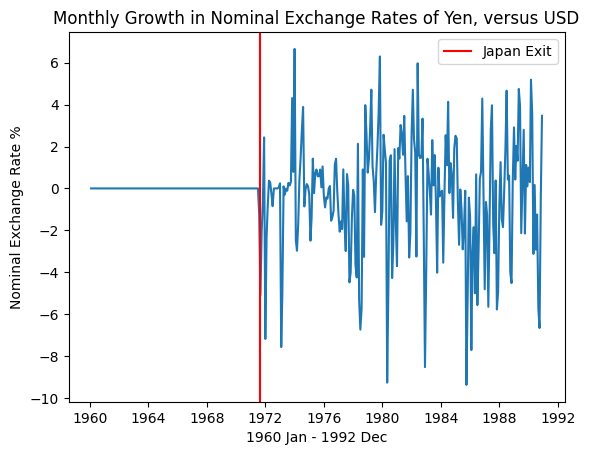

In [148]:
#Plot a time series graph of the monthly growth in nominal exchange rates of Yen, versus the US dollar
plot_TS(ER_growth,"Nominal Exchange Rate %", "Monthly Growth in Nominal Exchange Rates of Yen, versus USD")

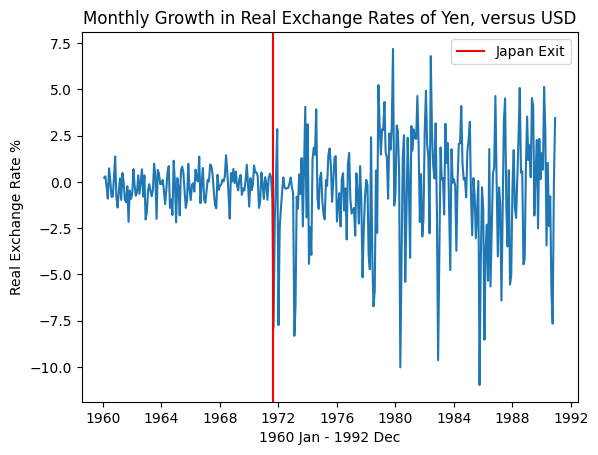

In [149]:
#Plot a time series graph of the monthly growth in real exchange rates of Yen, versus the US dollar
plot_TS(RER_growth,"Real Exchange Rate %", "Monthly Growth in Real Exchange Rates of Yen, versus USD")

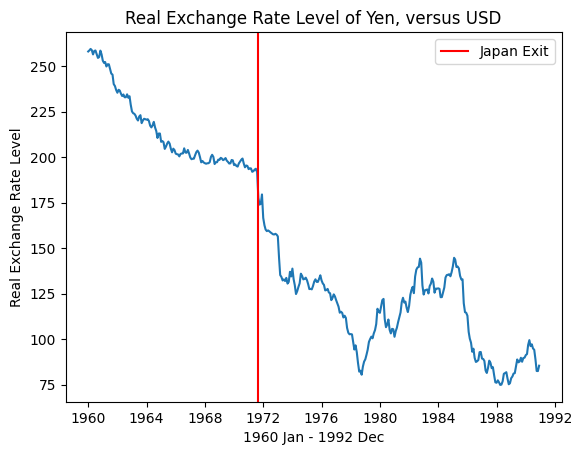

In [150]:
#Plot a time series graph of the real exchange rate level of Yen, versus the US dollar
plot_TS(RER,"Real Exchange Rate Level", "Real Exchange Rate Level of Yen, versus USD")


In [151]:
#create a new pandas series including US and Japan International Reserve Index until the exit of Japan
IR_exit = pd.concat([japan1.loc[japan1['Date'] <= left_date,'Date'], J_IR_index, US_IR_index], axis=1)
IR_exit.rename(columns={'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':'Japan International Reserve Index', 'IR' :'US International Reserve Index'}, inplace=True)
IR_exit.head()

,Date,Japan International Reserve Index,US International Reserve Index
0,1960-01-01,100.000000,100.000000
1,1960-02-01,99.520746,99.616353
2,1960-03-01,102.275511,99.378902
3,1960-04-01,103.929333,99.068353
4,1960-05-01,106.273653,98.864890


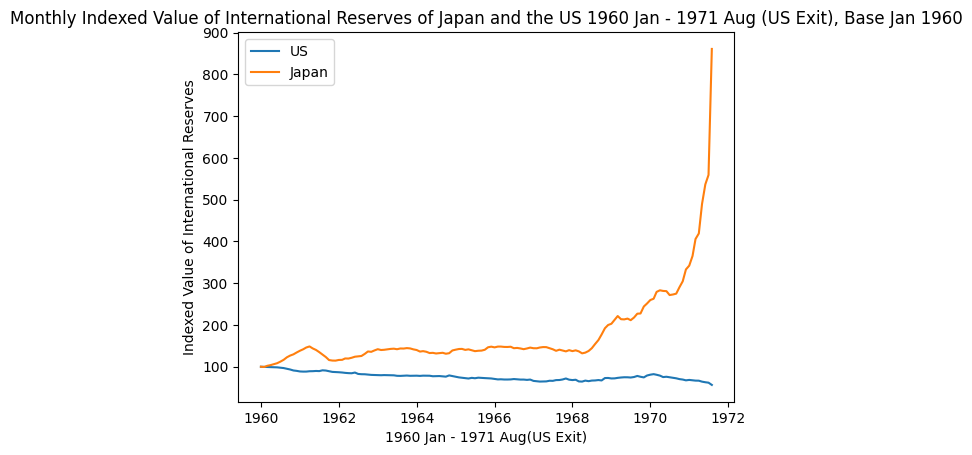

In [152]:
#Plot a time series graph of the monthly indexed value of international reserves of Japan and the US from January 1960 until the exit of the US from Bretton Woods.
#x-axis months
month_number_exit = IR_exit['Date']
#y-axis US International Reserve Index and Japan International Reserve Index
US_IR_exit = IR_exit['US International Reserve Index']
J_IR_exit = IR_exit['Japan International Reserve Index']
#plot the graph
plt.plot(month_number_exit, US_IR_exit, label='US')
plt.plot(month_number_exit, J_IR_exit, label='Japan')
#add xlabel "1960 Jan - "1971 Aug"
plt.xlabel("1960 Jan - 1971 Aug(US Exit)")
#add ylabel "Indexed Value of International Reserves"
plt.ylabel("Indexed Value of International Reserves")
#add title"Monthly Indexed Value of International Reserves of Japan and the US from January 1960 until the exit of the US from Bretton Woods (Base 1960 Jan)"
plt.title(
    "Monthly Indexed Value of International Reserves "
    "of Japan and the US 1960 Jan - 1971 Aug (US Exit), Base Jan 1960")
#show legend
plt.legend()
#show result
plt.show()

**5.3.2**

In [153]:
import matplotlib.pyplot as plt
#create var for dates
month_number = japan1.loc[:,'Date']

In [154]:
# define a function for plotting a time-series graph
def plot_TS(y, ylabel, title):
  plt.plot(month_number, y)
  plt.xlabel("1960 Jan - 1992 Dec")
  plt.ylabel(ylabel)
  plt.title(title)
  plt.axvline(x=left_date, color='r', linestyle='-', label = 'Japan Exit')
  plt.legend()
  plt.show()

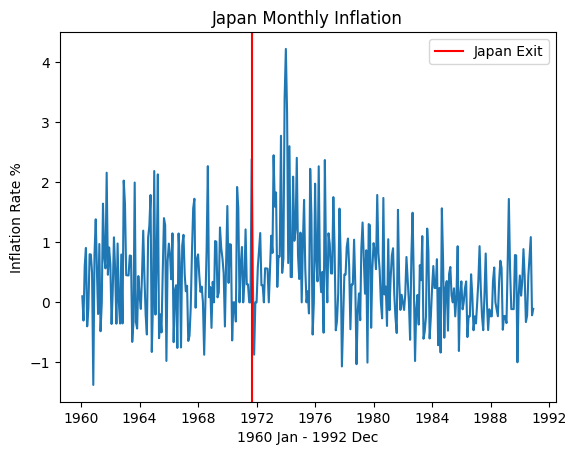

In [155]:
#Plot a time series graph of the monthly inflation rate of Japan
plot_TS(JP_inflation_rate,"Inflation Rate %", "Japan Monthly Inflation")

In [156]:
#The monthly Industrial Production growth
J_IP = japan1.loc[:,"Economic Activity, Industrial Production, Index"]
previous_month_J_IP = J_IP.shift(1)
Industrial_Production_growth_rate = ((J_IP - previous_month_J_IP) / previous_month_J_IP) * 100
Industrial_Production_growth_rate.head()

0          NaN
1    12.500000
2     7.843137
3    -6.666667
4     0.649351
Name: Economic Activity, Industrial Production, Index, dtype: float64

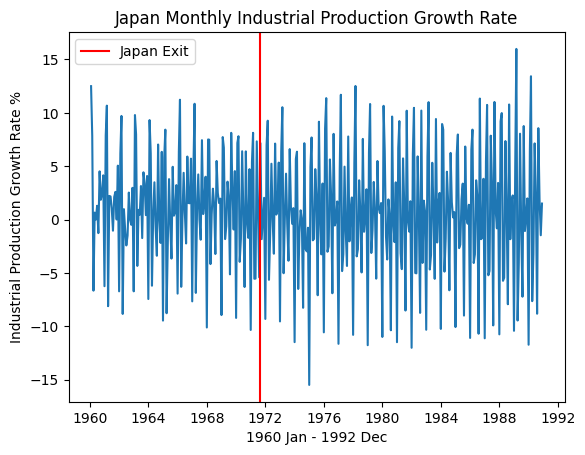

In [157]:
#Plot the monthly Industrial Production growth
plot_TS(Industrial_Production_growth_rate,"Industrial Production Growth Rate %", "Japan Monthly Industrial Production Growth Rate")

In [158]:
#The Industrial Production growth vs 12 months ago
J_IP12 = japan1.loc[:,"Economic Activity, Industrial Production, Index"]
previous_month_12_J_IP = J_IP12.shift(12)
Industrial_Production_growth_rate12 = ((J_IP12 - previous_month_12_J_IP) / previous_month_12_J_IP) * 100
Industrial_Production_growth_rate12.head(20)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12    21.323529
13    16.339869
14    19.393939
15    17.532468
16    19.354839
17    21.935484
18    21.656051
19    21.935484
Name: Economic Activity, Industrial Production, Index, dtype: float64

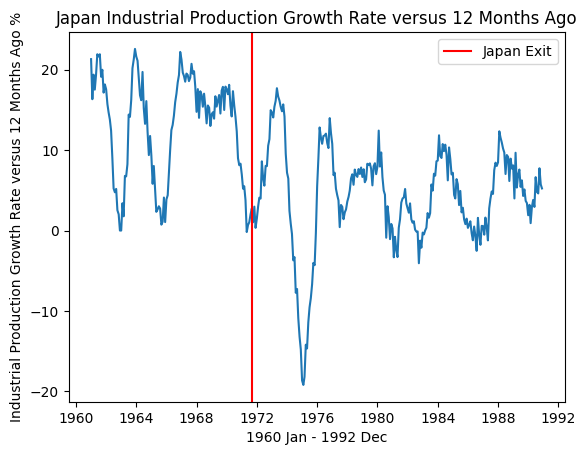

In [159]:
#Plot the monthly Industrial Production growth vs 12 months ago
plot_TS(Industrial_Production_growth_rate12,"Industrial Production Growth Rate versus 12 Months Ago %", "Japan Industrial Production Growth Rate versus 12 Months Ago")

Text(0.5, 1.0, 'Monthly Industrial Production Growth vs Industrial Production Growth vs 12 Months Ago')

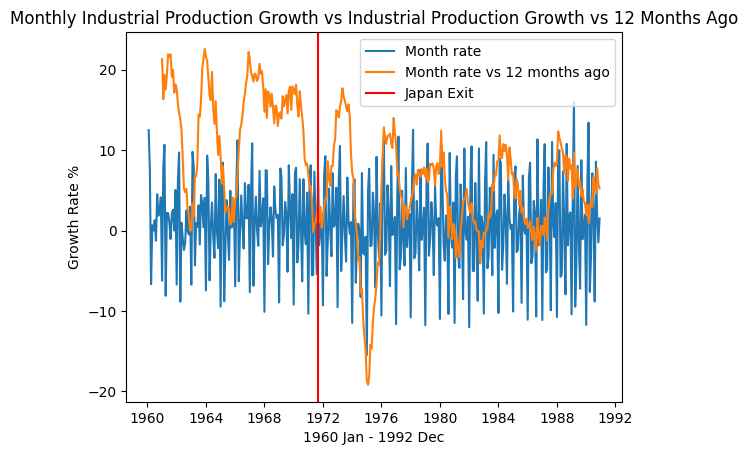

In [160]:
#'monthly Industrial Production growth'vs 'Industrial Production growth vs 12 months ago'
month_number = japan1.loc[:,'Date']
plt.plot(month_number, Industrial_Production_growth_rate, label='Month rate')
plt.plot(month_number, Industrial_Production_growth_rate12, label='Month rate vs 12 months ago')
#add xlabel "1960 Jan - 1992 Dec"
plt.xlabel("1960 Jan - 1992 Dec")
#add ylabel "Nominal Exchange Rate %"
plt.ylabel("Growth Rate %")
plt.axvline(x=left_date, color='r', linestyle='-', label = 'Japan Exit')
plt.legend()
plt.title("Monthly Industrial Production Growth vs Industrial Production Growth vs 12 Months Ago")

**5.3.3**

In [161]:
df = pd.concat([japan1.loc[:,'Date'], ER_growth, RER_growth, JP_inflation_rate, IP_year_growth, inflation_d], axis=1)
df.rename(columns={'Exchange Rates, US Dollar per Domestic Currency, Period Average, Rate':'ER_growth', 0 :'RER_growth', 'Prices, Consumer Price Index, All items, Index':'JP_inflation_rate', 'Economic Activity, Industrial Production, Index':'IP_year_growth', 1:'inflation_d'}, inplace=True)
df.head()

,Date,ER_growth,RER_growth,JP_inflation_rate,IP_year_growth,inflation_d
0,1960-01-01,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,0.0,0.239254,0.101226,NaN,-0.240070
2,1960-03-01,0.0,0.303372,-0.303372,NaN,-0.303372
3,1960-04-01,0.0,-0.267489,0.608535,NaN,0.268399
4,1960-05-01,0.0,-0.907254,0.907254,NaN,0.907254


In [162]:
# Define the date of the Bretton Woods system
before_bretton_woods_end = pd.to_datetime('Jul 1971')
after_bretton_woods_start = pd.to_datetime('Jan 1973')

In [163]:
#The standard deviation of the monthly growth of nominal exchange rates versus the US dollar
#Re-attempting to add a datetime index for easier slicing by date
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y', errors='coerce')
df = df.dropna(subset=['Date']) # Drop rows with NaT in 'Date' before setting as index
df.set_index('Date', inplace=True)
# Separate the data into two periods: before and after Bretton Woods
before_bretton_woods_data = df[:before_bretton_woods_end][['ER_growth', 'RER_growth', 'JP_inflation_rate', 'IP_year_growth', 'inflation_d']].dropna()
after_bretton_woods_data = df[after_bretton_woods_start:][['ER_growth', 'RER_growth', 'JP_inflation_rate', 'IP_year_growth', 'inflation_d']].dropna()

# Calculate the standard deviation for both periods
std_before_bretton_woods = before_bretton_woods_data.std()
std_after_bretton_woods = after_bretton_woods_data.std()

(std_before_bretton_woods, std_after_bretton_woods)

(ER_growth            0.000000
 RER_growth           0.792082
 JP_inflation_rate    0.752000
 IP_year_growth       6.452918
 inflation_d          0.793531
 dtype: float64,
 ER_growth            2.868368
 RER_growth           3.076954
 JP_inflation_rate    0.822810
 IP_year_growth       6.418286
 inflation_d          0.797781
 dtype: float64)

In [164]:
std_data = {'Variable': ['ER_growth', 'RER_growth', 'JP_inflation_rate', 'IP_year_growth', 'inflation_d'],'Std Before Bretton Woods': [0.0, 0.792082, 0.752000, 6.452918, 0.793531],'Std After Bretton Woods': [2.863868, 3.076954, 0.822810, 6.418286, 0.797781]}

std_df = pd.DataFrame(std_data)

# Calculate the ratio of the standard deviations after to before Bretton Woods
std_df['Ratio Before/After'] = std_df['Std Before Bretton Woods'] / std_df['Std After Bretton Woods']

# Replace any infinite values with NaN since division by zero gives infinity
std_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Display the DataFrame
std_df

,Variable,Std Before Bretton Woods,Std After Bretton Woods,Ratio Before/After
0,ER_growth,0.000000,2.863868,0.000000
1,RER_growth,0.792082,3.076954,0.257424
2,JP_inflation_rate,0.752000,0.822810,0.913941
3,IP_year_growth,6.452918,6.418286,1.005396
4,inflation_d,0.793531,0.797781,0.994673
